In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    

In [2]:
df = pd.read_csv('../../project_1/Crime_Data_from_2020_to_Present.csv')

df.head(20)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,201710201,06/19/2020 12:00:00 AM,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,AO,Adult Other,341.0,NaN,NaN,NaN,11900 BALBOA BL,NaN,34.2864,-118.5021


In [3]:
# Drop crm cd different than cd1
clean_df = df[df['Crm Cd'] == df['Crm Cd 1']]

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818877 entries, 0 to 820598
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           818877 non-null  int64  
 1   Date Rptd       818877 non-null  object 
 2   DATE OCC        818877 non-null  object 
 3   TIME OCC        818877 non-null  int64  
 4   AREA            818877 non-null  int64  
 5   AREA NAME       818877 non-null  object 
 6   Rpt Dist No     818877 non-null  int64  
 7   Part 1-2        818877 non-null  int64  
 8   Crm Cd          818877 non-null  int64  
 9   Crm Cd Desc     818877 non-null  object 
 10  Mocodes         705422 non-null  object 
 11  Vict Age        818877 non-null  int64  
 12  Vict Sex        710951 non-null  object 
 13  Vict Descent    710943 non-null  object 
 14  Premis Cd       818867 non-null  float64
 15  Premis Desc     818394 non-null  object 
 16  Weapon Used Cd  284516 non-null  float64
 17  Weapon Des

In [4]:
# Number of records with un-specified sex
test= clean_df[clean_df['Vict Sex'] == 'X']
test1 = test.groupby(test['Crm Cd Desc'])
test2 = test1['Crm Cd Desc'].value_counts()
test2.sort_values(ascending=False)


Crm Cd Desc                                              Crm Cd Desc                                            
BURGLARY                                                 BURGLARY                                                   11417
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                 SHOPLIFTING - PETTY THEFT ($950 & UNDER)                   10590
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     9538
ROBBERY                                                  ROBBERY                                                     4621
THEFT PLAIN - PETTY ($950 & UNDER)                       THEFT PLAIN - PETTY ($950 & UNDER)                          4288
                                                                                                                    ...  
BIGAMY                                                   BIGAMY                                                         1
CONTRIBUTING                     

# 1) What are the specific profiles that are most vulnerable to be victims of a crime? (sex, age, race)
## Sex


M    338180
F    301253
X     71427
Name: Vict Sex, dtype: int64

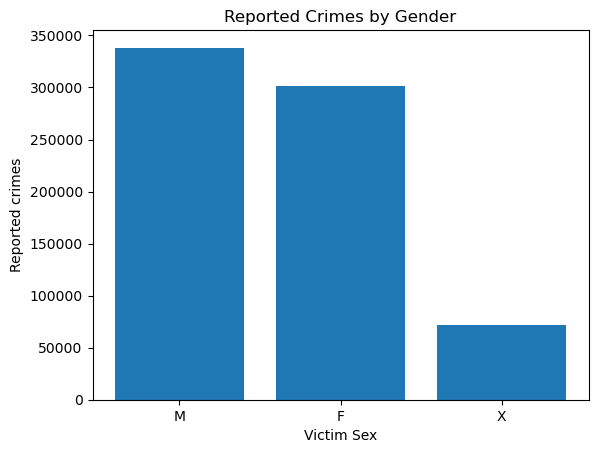

In [5]:
#Drop H and "-" values from sex 

#clean_sex_df=clean_df[clean_df['Vict Sex']==('M') 
to_keep=['M','F','X']

clean_sex_df=clean_df[clean_df["Vict Sex"].isin(to_keep)]
clean_sex_df["Vict Sex"]

sex=clean_sex_df["Vict Sex"].value_counts()
plt.bar(sex.index,sex.values)

plt.title('Reported Crimes by Gender')
plt.xlabel('Victim Sex')
plt.ylabel('Reported crimes')
sex



## Age

30    18690
35    18290
31    17904
29    17832
28    17576
      ...  
94       93
96       84
95       77
98       64
97       61
Name: Vict Age, Length: 98, dtype: int64

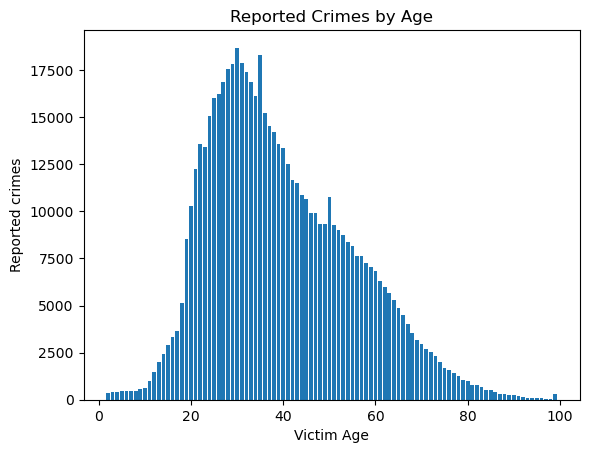

In [9]:
#Drop  negative values from Age

to_drop=[0,-1,-2,-3]

clean_Age_df=clean_sex_df[~clean_sex_df["Vict Age"].isin(to_drop)]

clean_Age_df ["Vict Age"]

Age=clean_Age_df["Vict Age"].value_counts()

plt.bar(Age.index,Age.values)

plt.title('Reported Crimes by Age')
plt.xlabel('Victim Age')
plt.ylabel('Reported crimes')
Age


## Race

H    246649
W    155026
B    115238
O     54258
A     17638
X     12925
K      4344
F      3355
C      3138
J      1138
V       840
I       770
Z       412
P       218
U       135
D        61
G        58
L        49
S        40
-         1
Name: Vict Descent, dtype: int64

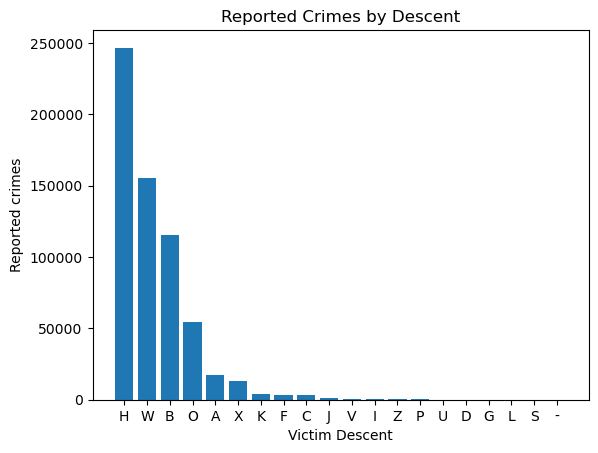

In [10]:
#to_drop=[0,-1,-2,-3]

#clean_Age_df=clean_sex_df[~clean_sex_df["Vict Age"].isin(to_drop)]

clean_Age_df ["Vict Descent"]

Descent=clean_Age_df["Vict Descent"].value_counts()

plt.bar(Descent.index,Descent.values)

plt.title('Reported Crimes by Descent')
plt.xlabel('Victim Descent')
plt.ylabel('Reported crimes')
Descent